# Assignment: regression

Regression is a predictive modeling task that involves predicting a numerical output given some input. It is different from classification tasks that involve predicting a class label.

Typically, a regression task involves predicting a single numeric value. Although, some tasks require predicting more than one numeric value. These tasks are referred to as multiple-output regression, or multi-output regression for short.

In multi-output regression, two or more outputs are required for each input sample, and the outputs are required simultaneously. The assumption is that the outputs are a function of the inputs.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-a-dataset" data-toc-modified-id="Create-a-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create a dataset</a></span></li><li><span><a href="#Buid-a-neuronal-network-for-multiple-ouput" data-toc-modified-id="Buid-a-neuronal-network-for-multiple-ouput-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Buid a neuronal network for multiple ouput</a></span></li><li><span><a href="#Fit-the-model-and-plot-learning-curve" data-toc-modified-id="Fit-the-model-and-plot-learning-curve-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit the model and plot learning curve</a></span></li><li><span><a href="#Evaluate-your-model" data-toc-modified-id="Evaluate-your-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluate your model</a></span></li><li><span><a href="#To-train-with-a-real-dataset" data-toc-modified-id="To-train-with-a-real-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>To train with a real dataset</a></span><ul class="toc-item"><li><span><a href="#Preprocess-the-data-(outlier-?-missing-value-?)" data-toc-modified-id="Preprocess-the-data-(outlier-?-missing-value-?)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preprocess the data (outlier ? missing value ?)</a></span></li><li><span><a href="#Build-and-fit-the-model" data-toc-modified-id="Build-and-fit-the-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Build and fit the model</a></span></li><li><span><a href="#Predict-insurance-charge-on-new-data" data-toc-modified-id="Predict-insurance-charge-on-new-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Predict insurance charge on new data</a></span></li></ul></li></ul></div>

## Create a dataset

Using make_regression() function from the scikit-learn library create a data set that will have 1000 sample, 10 input features and two numeric outputs for each sample

In [1]:
''' Create the dataset '''
from sklearn.datasets import make_regression

N_items = 1000
N_features = 10
N_targets = 2

# create dataset
X, y = make_regression(n_samples=N_items, n_features=N_features, n_targets=N_targets, random_state=0)

# summarize shape
print(X.shape, y.shape)

(1000, 10) (1000, 2)


In [2]:
from sklearn.preprocessing import MinMaxScaler

''' Normalize train and test part '''
# Normalize features
scalarX = MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)

# Normalize target value
scalarY = MinMaxScaler()
scalarY.fit(y.reshape(N_items,2))
y = scalarY.transform(y.reshape(N_items,2))

In [3]:
from sklearn.model_selection import train_test_split

''' Split the dataset between train and test'''
# Split dataset into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# summarize train shape
X_train.shape, y_train.shape

((800, 10), (800, 2))

## Buid a neuronal network for multiple ouput

Neural network models also support multi-output regression and have the benefit of learning a continuous function that can model a more graceful relationship between changes in input and output.

Multi-output regression can be supported directly by neural networks simply by specifying the number of target variables there are in the problem as the number of nodes in the output layer. For example, a task that has three output variables will require a neural network output layer with three nodes in the output layer, each with the linear (default) activation function.

Use:
* adam as optimizer
* mean_squared_error as loss
* root_mean_squared_error as metrics

In [4]:
''' define and compile the model '''
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.metrics import RootMeanSquaredError
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.03)
loss = "mean_squared_error"
metrics = [RootMeanSquaredError()]

# This returns a tensor
inputs = Input(shape=(N_features,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(8, activation='relu')(inputs)
output_2 = Dense(16, activation='relu')(output_1)
predictions = Dense(2, activation='linear')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


## Fit the model and plot learning curve

Use:
* as many epochs as necessary
* validation split: 10 %

In [5]:
N_epochs = 25
validation_split = 0.1

history = model.fit(X_train, y_train, epochs=N_epochs, validation_split=validation_split, verbose=2)

Epoch 1/25
23/23 - 0s - loss: 0.0368 - root_mean_squared_error: 0.1918 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 2/25
23/23 - 0s - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 3/25
23/23 - 0s - loss: 0.0093 - root_mean_squared_error: 0.0967 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 4/25
23/23 - 0s - loss: 0.0050 - root_mean_squared_error: 0.0706 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 5/25
23/23 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 6/25
23/23 - 0s - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 9.0667e-04 - val_root_mean_squared_error: 0.0301
Epoch 7/25
23/23 - 0s - loss: 4.9682e-04 - root_mean_squared_error: 0.0223 - val_loss: 4.2313e-04 - val_root_mean_squared_error: 0.0206
Epoch 8/25
23/23 - 0s - loss: 2.5253e-04 - root_mean_squared_error: 0.0159 - val_loss: 1.575

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


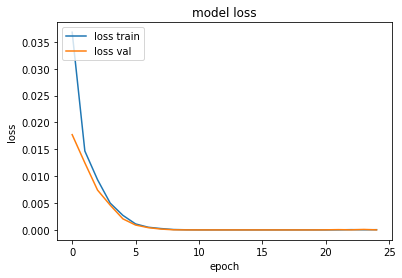

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

## Evaluate your model

Report the RMSE given by our model

In [7]:
model.metrics_names

['loss', 'root_mean_squared_error']

In [8]:
# Evaluate the model
RMSE = model.evaluate(X_test, y_test)

# summarize performance
print(RMSE)

7/7 [==============================] - 0s 2ms/step - loss: 1.0478e-05 - root_mean_squared_error: 0.0032
[1.0478159310878254e-05, 0.0032369985710829496]


## To train with a real dataset

Understanding the data
* Age: insurance contractor age, years
* Sex: insurance contractor gender, [female, male]
* BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* Children: number of children covered by health insurance / Number of dependents
* Smoker: smoking, [yes, no]
* Region: the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]

You have to predict the charges
* Charges: Individual medical costs billed by health insurance, $ #predicted value

In [9]:
import pandas as pd

df = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preprocess the data (outlier ? missing value ?)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Build and fit the model

In [11]:
for col in ["sex", "smoker", "region"]:
    new_cols = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,new_cols],axis=1)
    df.drop([col],axis=1, inplace=True)

X = df.drop(["charges"], axis=1)
y = df["charges"]

In [12]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [13]:
X.shape

(1338, 11)

In [14]:
y = y.values.reshape((len(y),1))
y.shape

(1338, 1)

In [15]:
''' Normalize train and test part '''
# Normalize features
scalarX = MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)

# Normalize target value
scalarY = MinMaxScaler()
scalarY.fit(y)
y = scalarY.transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train.shape, y_train.shape

((1070, 11), (1070, 1))

In [18]:
X_train

array([[0.63043478, 0.4315308 , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.60869565, 0.26472962, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.10869565, 0.56873823, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.76086957, 0.13290288, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10869565, 0.9260156 , 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [19]:
# This returns a tensor
inputs = Input(shape=(11,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(32, activation='relu')(inputs)
output_2 = Dense(16, activation='relu')(output_1)
output_3 = Dense(8, activation='relu')(output_2)
predictions = Dense(1)(output_3)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer="rmsprop",
              loss='mse',
              metrics=["mae"])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit the model
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1268
Epoch 2/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0142 - mae: 0.0888
Epoch 3/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0716
Epoch 4/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0091 - mae: 0.0658
Epoch 5/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0084 - mae: 0.0612
Epoch 6/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0591
Epoch 7/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0079 - mae: 0.0590
Epoch 8/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0078 - mae: 0.0580
Epoch 9/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0075 - mae: 0.0571
Epoch 10/25
34/34 [==============================] - 0s 3ms/step - loss: 0.0073 - mae: 0.0561
Epoch 11/25
34/34 [==============================] - 0s 3ms/step - lo

dict_keys(['loss', 'mae'])


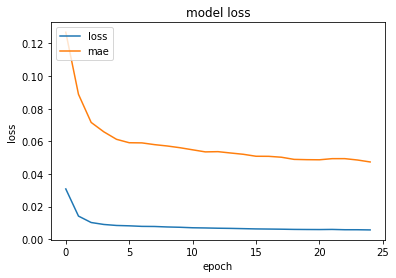

In [21]:
''' Plot learning curve '''
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mae'], loc='upper left')
plt.show()

### Predict insurance charge on new data

Let’s imagine 3 different people and see what charges on health care will be for them.

* Bob: 19 years old, BMI 27.9, has no children, smokes, from northwest region.
* Lisa: 40 years old, BMI 50, 2 children, doesn’t smoke, from southeast region.
* John: 30 years old. BMI 31.2, no children, doesn’t smoke, from northeast region.

In [22]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0097 - mae: 0.0653


[0.009701341390609741, 0.06531209498643875]

In [23]:
data = {"age": [19, 40, 30],
        "sex": ["male", "female", "male"],
        "bmi": [27.9, 50., 31.2],
        "children": [0, 2, 0],
        "smoker": ["yes", "no", "yes"],
        "region": ["northwest", "southeast", "northeast"]}

test_df = pd.DataFrame(data)
test_df

,age,sex,bmi,children,smoker,region
0,19,male,27.9,0,yes,northwest
1,40,female,50.0,2,no,southeast
2,30,male,31.2,0,yes,northeast


In [24]:
for col in ["sex", "smoker", "region"]:
    new_cols = pd.get_dummies(test_df[col], prefix=col)
    test_df = pd.concat([test_df,new_cols],axis=1)
    test_df.drop([col],axis=1, inplace=True)

In [25]:
test_df["region_soutwest"]=[0,0,0]
test_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_soutwest
0,19,27.9,0,0,1,0,1,0,1,0,0
1,40,50.0,2,1,0,1,0,0,0,1,0
2,30,31.2,0,0,1,0,1,1,0,0,0


In [26]:
ypred = model.predict(scalarX.transform(test_df))

In [27]:
scalarY.inverse_transform(ypred)

array([[17208.453],
       [14927.059],
       [27029.195]], dtype=float32)